<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/sentiment_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Download dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (25000,), (25000,)
Test: (25000,), (25000,)


In [9]:
# Process data
class_names = ['Negative', 'Positive']
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [10]:
# Data has no consistent shape!
def show_lengths():
    print('Length of 1st training example: ', len(x_train[0]))
    print('Length of 2nd training example: ',  len(x_train[1]))
    print('Length of 1st test example: ', len(x_test[0]))
    print('Length of 2nd test example: ',  len(x_test[1]))
    
show_lengths()

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260


In [14]:
# Pad datasets to have consistent shape
SHAPE = 256
x_train = pad_sequences(x_train, value=word_index['the'],
                        padding='post', maxlen=SHAPE)
x_test = pad_sequences(x_test, value=word_index['the'],
                       padding='post', maxlen=SHAPE)

show_lengths()

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [15]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [17]:
# Create Model
model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train Model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20
)

Epoch 1/20
625/625 [==============================] - 3s 5ms/step - loss: 0.5449 - acc: 0.7521 - val_loss: 0.3586 - val_acc: 0.8652
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2819 - acc: 0.8950 - val_loss: 0.2869 - val_acc: 0.8822
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2136 - acc: 0.9220 - val_loss: 0.2751 - val_acc: 0.8894
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1752 - acc: 0.9364 - val_loss: 0.2825 - val_acc: 0.8880
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1465 - acc: 0.9485 - val_loss: 0.2925 - val_acc: 0.8900
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1232 - acc: 0.9598 - val_loss: 0.3118 - val_acc: 0.8832
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1042 - acc: 0.9673 - val_loss: 0.3442 - val_acc: 0.8784
Epoch 8/20
625/625 [==============================] - 3s 4ms/step - loss: 0.

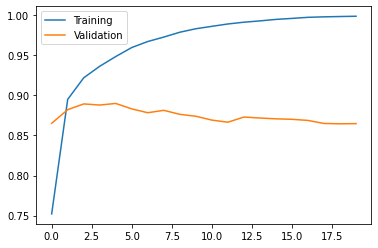

In [21]:
# Plot training
plt.plot(history.history['acc'], label = 'Training')
plt.plot(history.history['val_acc'], label = 'Validation')
plt.legend()
plt.show()

In [23]:
# Evaluate Model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test set accuracy: {acc*100:.2f}")

Test set accuracy: 84.19
